## Compilando el módulo desde C++

Definir los path al ejecutable de python y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [ ]:
!cd .. && mkdir build
!cd ../build && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
  
!cd ../build && make install

In [36]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import metnum

- Country
- Status: Developed or Developing status
- Life expectancy: life expectancy in age
- Adult mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: PBI per capita (en USD)
- Population: Population of the country
- thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

In [34]:
df = pd.read_csv('../dataset/expectativa_de_vida.csv').drop(columns=["Unnamed: 0"])
df.head()


,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing
2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing
3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,Developing


Cosas para gregar: 
gasto publico
indice de paz global

podemos comparar:
EV contra todos (grafico, correlacion, R cuadrado, otras medidas..)

ahi vemos que onda. que cosas tienen correlacion.


Podemos pensar que dos variables por separado no dicen mucho, pero juntas pueden llegar a correlacionar mejor.

visto estos datos pensemos un modelo de como se compone la EV de la forma
EV = a_0 + a_1 T_1(Alguna_columna) +  ... + a_n T_n(Alguna_columna)



## Acercamiento a cómo se relacionan las variables con la esperanza de vida

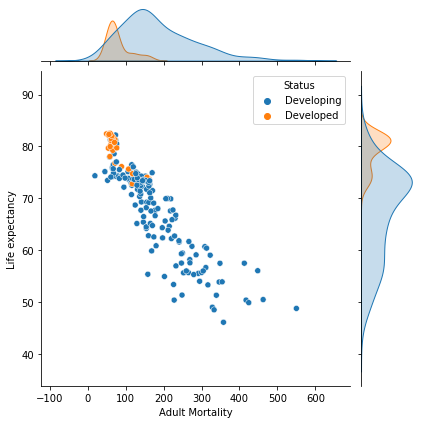

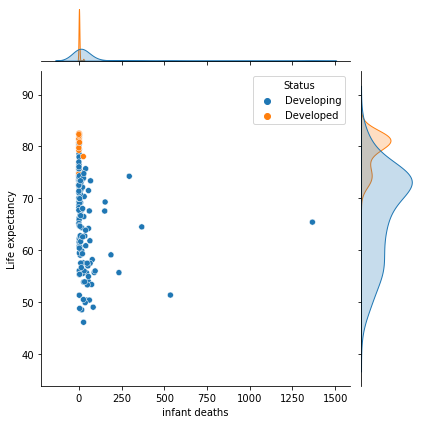

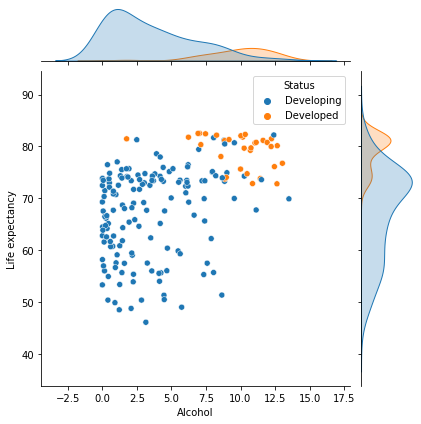

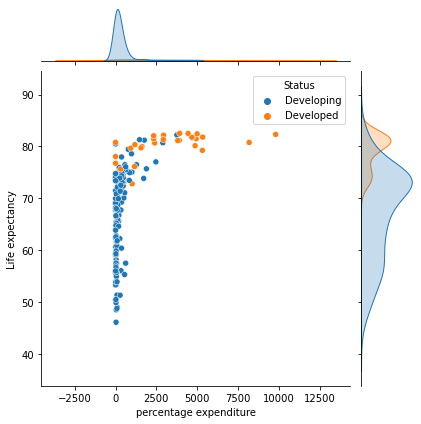

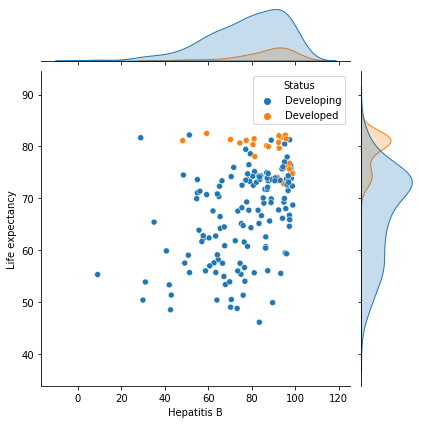

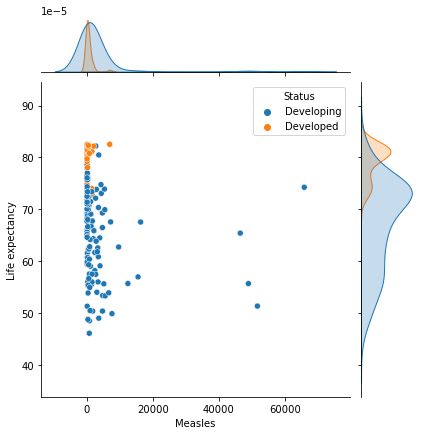

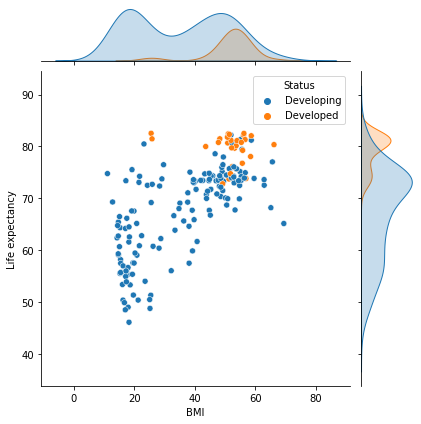

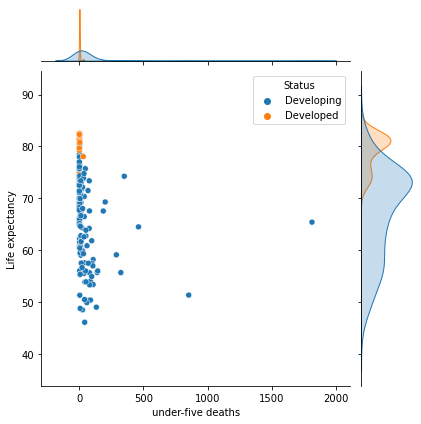

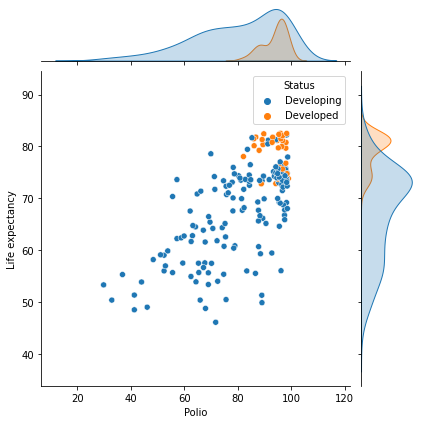

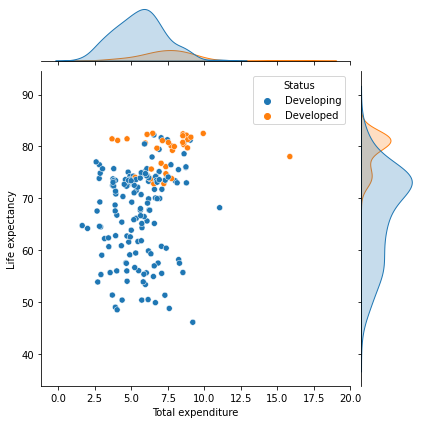

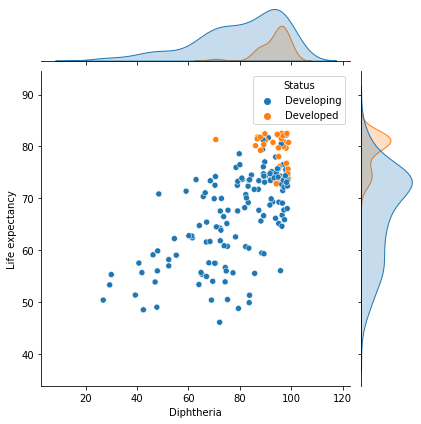

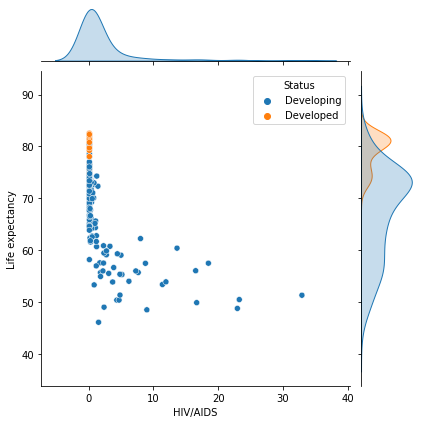

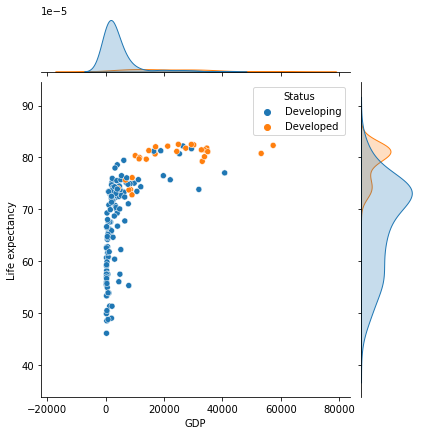

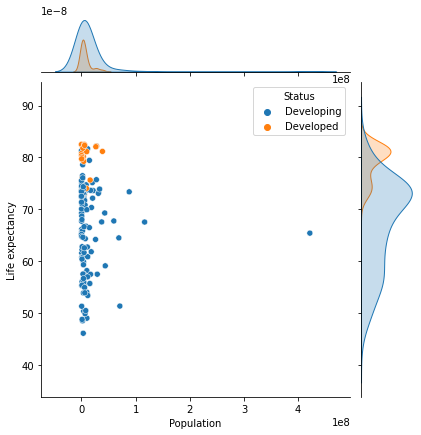

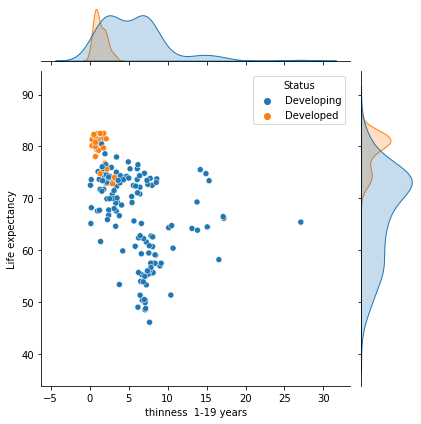

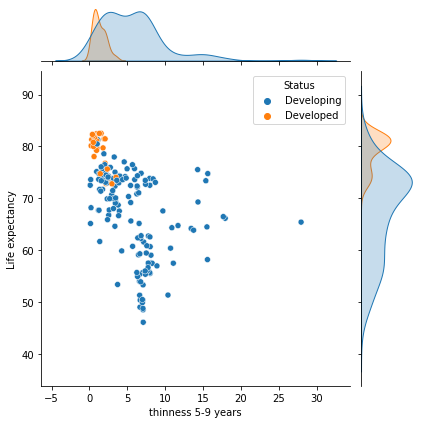

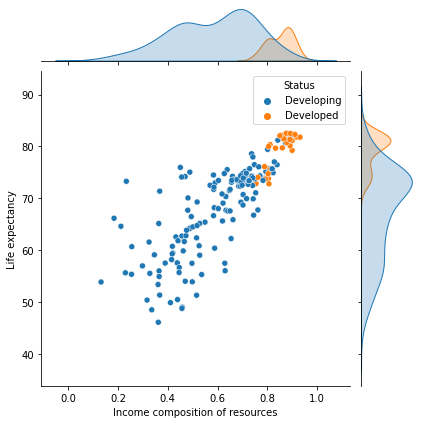

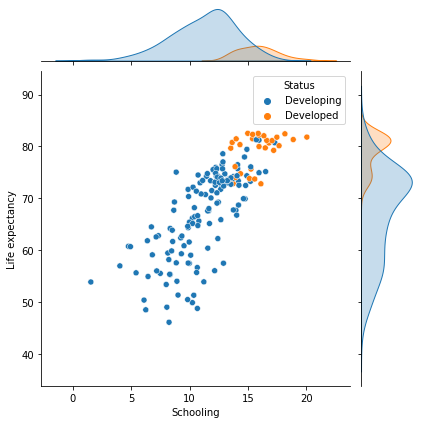

In [40]:
df_drop = df.drop(columns=["Country", "Life expectancy", "Status"])

for i, col in enumerate(df_drop):
    
    plot = sns.jointplot(data=df, x=col, y="Life expectancy", hue="Status")
    plt.show()




## Les agrego a los que parecen lineales la raya con el R2
El de HIV parece que si hay muertes puede haber correlacion

0.4156218709007752


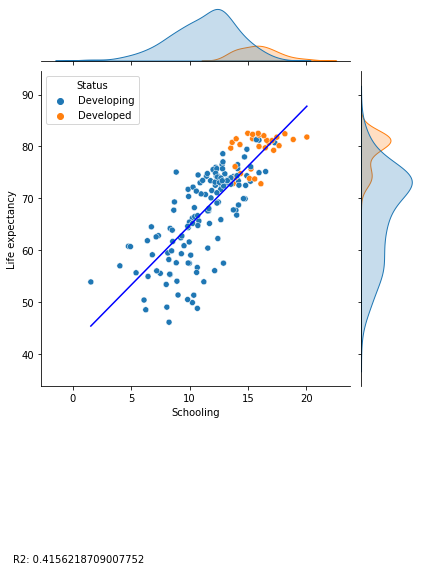

0.5038456805008706


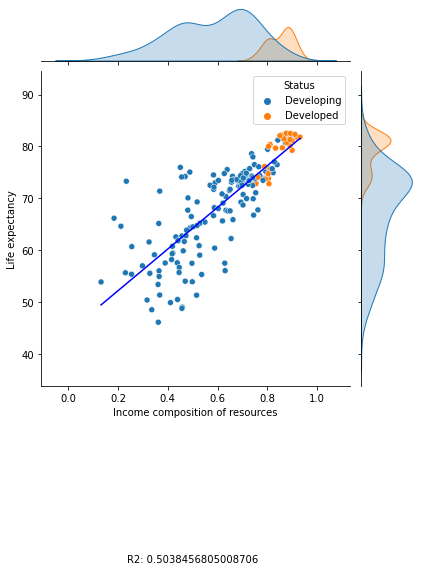

-4.15544094149136


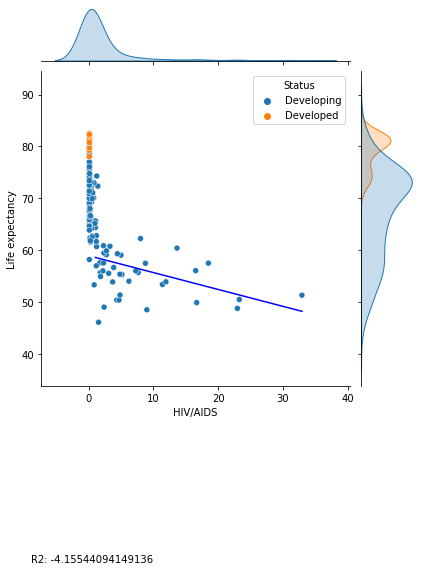

0.7556107940917319


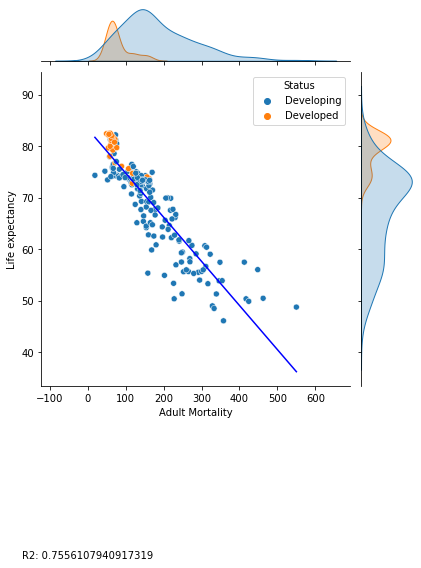

0.0913173470373877


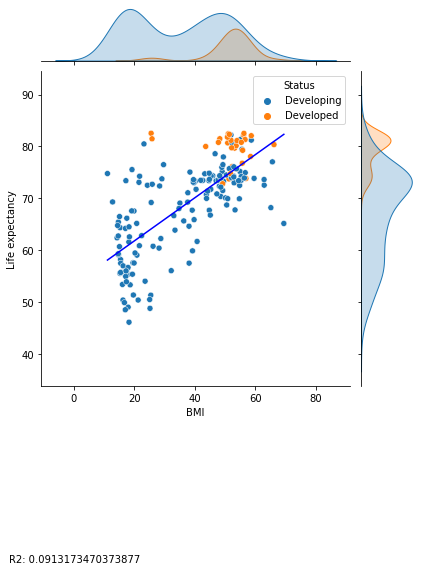

In [56]:
cols_lineales = ["Schooling","Income composition of resources", "HIV/AIDS", "Adult Mortality", "BMI"]


for col in cols_lineales:
    
    plot = sns.jointplot(data=df, x=col, y="Life expectancy", hue="Status")

    if (col=="HIV/AIDS"):
        X = df[df["HIV/AIDS"]>1][col].values
        y = df[df["HIV/AIDS"]>1]['Life expectancy'].values
    else:
        X = df[col].values
        y = df['Life expectancy'].values
        

    mask = ~np.isnan(X) & ~np.isnan(y)
    X = X[mask].reshape(-1,1)
    y = y[mask].reshape(-1,1)


    reg = metnum.LinearRegression()
    reg.fit(X,y) 
    
    R2 = r2_score(reg.predict(X), y)
    plot.ax_joint.text(0.5, 0.5,horizontalalignment='center', verticalalignment='center',s = f"R2: {R2}")
    print(R2)
    
    plot.ax_joint.plot([X.min(), X.max()], [ reg.intercept() + X.min() * reg.coef()[0], reg.intercept() + X.max() * reg.coef()[0] ], 'b-')
    plt.show()


In [ ]:
cols_log = ["Life expectancy", "Status", "GDP", "percentage expenditure"]

for col in cols_log:
    
    plot = sns.jointplot(data=df, x=col, y="Life expectancy", hue="Status")

    if (col=="HIV/AIDS"):
        X = df[df["HIV/AIDS"]>1][col].values
        y = df[df["HIV/AIDS"]>1]['Life expectancy'].values
    else:
        X = df[col].values
        y = df['Life expectancy'].values
        

    mask = ~np.isnan(X) & ~np.isnan(y)
    X = X[mask].reshape(-1,1)
    y = y[mask].reshape(-1,1)


    reg = metnum.LinearRegression()
    reg.fit(X,y) 
    
    R2 = r2_score(reg.predict(X), y)
    plot.ax_joint.text(0.5, 0.5,horizontalalignment='center', verticalalignment='center',s = f"R2: {R2}")
    print(R2)
    
    plot.ax_joint.plot([X.min(), X.max()], [ reg.intercept() + X.min() * reg.coef()[0], reg.intercept() + X.max() * reg.coef()[0] ], 'b-')
    plt.show()

In [ ]:

df_lin_cuadr = df_drop[["Life expectancy", "Status", "Diphtheria", "Polio"]]



que tan bien puedo predecir con LE = a_0 + a_1 1/mortalidad_infantil + a_2 Sochooling



ValueError: Could not interpret value `thinness 1-19 years` for parameter `x`

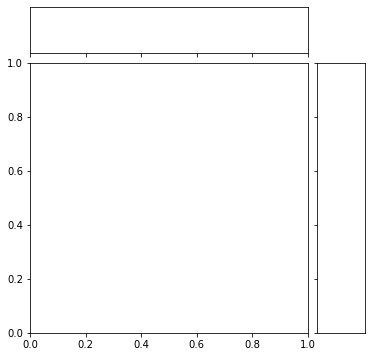

In [32]:
plot = sns.jointplot(data=df, x="thinness 1-19 years", y="Schooling", hue="Status")
    
X = df['thinness 1-19 years'].values
y = df['Schooling'].values
mask = ~np.isnan(X) & ~np.isnan(y)
X = X[mask].reshape(-1,1)
y = y[mask].reshape(-1,1)


reg = metnum.LinearRegression()
reg.fit(X,y) 

plot.ax_joint.plot([X.min(), X.max()], [ reg.intercept() + X.min() * reg.coef()[0], reg.intercept() + X.max() * reg.coef()[0] ], 'b-')
plt.show()

Plantear un modelo final